In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud = pd.read_csv('C:\\Users\\Admin\\Downloads\\Fraud_check.csv',index_col=0)

In [3]:
fraud.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO


In [4]:
fraud["income"]="<=30000"

In [5]:
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
fraud["income"].unique()

array(['Good', 'Risky'], dtype=object)

In [12]:
fraud= fraud.drop(['Taxable.Income'],axis = 1)

In [14]:
fraud.rename(columns={'Undergrad':'UG','Martial.Status':'Martial','City.Population':'Population','Work Experience':'exp'},inplace=True)

In [15]:
fraud

,Marital.Status,Population,Work.Experience,Urban,income
Undergrad,,,,,
NO,Single,50047,10,YES,Good
YES,Divorced,134075,18,YES,Good
NO,Married,160205,30,YES,Good
YES,Single,193264,15,YES,Good
NO,Married,27533,28,NO,Good
...,...,...,...,...,...
YES,Divorced,39492,7,YES,Good
YES,Divorced,55369,2,YES,Good
NO,Divorced,154058,0,YES,Good


In [16]:
colnames=list(fraud.columns)

In [17]:
colnames

['Marital.Status', 'Population', 'Work.Experience', 'Urban', 'income']

In [21]:
X=colnames[:4]
Y=colnames[4]

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
select_columns=["Marital.Status","Urban","income"]

In [30]:
le.fit(fraud[select_columns].values.flatten())
fraud[select_columns]=fraud[select_columns].apply(le.fit_transform)


In [31]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(fraud,test_size=0.3)


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model=DecisionTreeClassifier(criterion="entropy" ,max_depth=3)
train_model=model.fit(train[X],train[Y])
train_pred=model.predict(train[X])
pd.crosstab(train[Y],train_pred) 

col_0,0,1
income,,
0,338,1
1,78,3


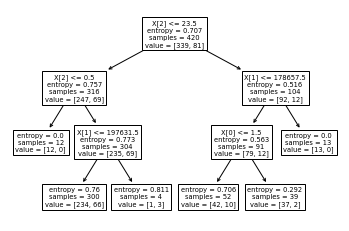

In [41]:
tree.plot_tree(model);

In [34]:
acc_train=np.mean(train.income == model.predict(train[X]))

In [37]:
test_pred=model.predict(test[X])
pd.crosstab(test[Y],test_pred)

col_0,0,1
income,,
0,102,35
1,37,6


In [38]:
test_acc=np.mean(test.income==model.predict(test[X]))